In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../")

In [3]:
from src.bayesian_PSL import PlayerComparison, RandomVariablePSL, TeamPSL, EPL_Data

In [4]:
from src.Player2Vec import Player2Vec, EPL_Graph

/Users/nacho/Desktop/code/understat-xg/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
EPL_Full_Data = EPL_Data(
    "../SampleData/epl.xlsx", "../SampleData/players.json", "R_storage.npy"
)

# epl = EPL_Full_Data.get_epl()
# epl_player_data = EPL_Full_Data.get_epl_player_data()
# R_storage = EPL_Full_Data.get_r_storage()
# Q_storage = EPL_Full_Data.get_q_storage()
# partidos = EPL_Full_Data.get_partidos()
# tp_ds = EPL_Full_Data.get_transition_prob_dataset()
# player_ids = EPL_Full_Data.get_player_ids()
# player_kdes = EPL_Full_Data.get_player_kdes()

In [147]:
# model_path = "EPL_Graph_model_3_Weight_Duration_Q.model"
model_path = "EPL_p2v_model_Q_Weighted_0.5q.model"
# model_path = "EPL_Graph_model_3__R_Weighted.model"
p2v_model = Player2Vec(model_path=model_path, epl_data=EPL_Full_Data)

In [8]:
player_ids = EPL_Full_Data.get_player_ids()
player_ids.astype(int)

array([     0,  17733,  19524,  15943,  20467,  80254,   8758,  42427,
        17127,  43274,  28566,  59936,  44346,  41792,  13227,  34392,
        15073,  63370,  17468,  19057,  28468,  28541,   3736,  66797,
        28448,  58771,   4396,  37339,  53371,  62419,  41184,  27707,
        12745,   7525,   8378,   6219,  15337,   1821,   9007,   7645,
        59949,  18981,  20695,  14965,  51940,  13017,  14075,  38530,
          363,  50175,   2404,  43250,  83090,  12297,  18892,  27258,
         4098,   1869,  37084,   4990,  39104,  15284,  11987,   1827,
        17160,  42518,   1256,  37334,  81025,  11735,  40451,  38297,
        19569,  19341,   5741,  18987,  19124,  41727,  15864,  15237,
        19236,  40204,  41262,  28499,  18421,  44683,  39155,  42774,
        19197,  15976,   3673,  57328, 101178,  17291,  38580,  11037,
        17339,  18867,  37572,  20312,  14664,  49384,  17476,   7551,
        15749,  20658,  20664,  28554,  17336,  42544,  42493,  42593,
      

In [9]:
player_kdes = EPL_Full_Data.get_player_kdes()
player_kdes

{0.0: {'losses_prob': 0,
  'gains_prob': <scipy.stats._kde.gaussian_kde at 0x15ee92ef0>,
  'shots_prob': 0,
  'avg_pass_to_prob': <scipy.stats._kde.gaussian_kde at 0x15ee92410>,
  'avg_pass_from_prob': 0},
 17733.0: {'losses_prob': <scipy.stats._kde.gaussian_kde at 0x15ee93490>,
  'gains_prob': <scipy.stats._kde.gaussian_kde at 0x15ee92c80>,
  'shots_prob': <scipy.stats._kde.gaussian_kde at 0x15ee92b60>,
  'avg_pass_to_prob': <scipy.stats._kde.gaussian_kde at 0x15ee92e90>,
  'avg_pass_from_prob': <scipy.stats._kde.gaussian_kde at 0x15ee92e60>},
 19524.0: {'losses_prob': <scipy.stats._kde.gaussian_kde at 0x15ee93040>,
  'gains_prob': <scipy.stats._kde.gaussian_kde at 0x15ee93850>,
  'shots_prob': <scipy.stats._kde.gaussian_kde at 0x15ee93b20>,
  'avg_pass_to_prob': <scipy.stats._kde.gaussian_kde at 0x15ee92d40>,
  'avg_pass_from_prob': <scipy.stats._kde.gaussian_kde at 0x15ee931f0>},
 15943.0: {'losses_prob': <scipy.stats._kde.gaussian_kde at 0x15ee93970>,
  'gains_prob': <scipy.stats._

In [10]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Transpose pd.DataFrame(player_kdes)
player_kdes_df = pd.DataFrame(player_kdes).T
# Replace index for index as int

player_kdes_df.index = player_ids.astype(int)
player_kdes_df

,losses_prob,gains_prob,shots_prob,avg_pass_to_prob,avg_pass_from_prob
0,0,<scipy.stats._kde.gaussian_kde object at 0x15e...,0,<scipy.stats._kde.gaussian_kde object at 0x15e...,0
17733,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...
19524,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...
15943,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...
20467,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...,<scipy.stats._kde.gaussian_kde object at 0x15e...
...,...,...,...,...,...
103912,0,0,0,0,0
92790,<scipy.stats._kde.gaussian_kde object at 0x159...,0,0,<scipy.stats._kde.gaussian_kde object at 0x159...,0
94738,0,0,0,0,0
76227,0,0,0,0,0


In [12]:
(player_kdes_df["shots_prob"] == 0).value_counts()

shots_prob
False    360
True     162
Name: count, dtype: int64

In [148]:
p2v_model.model.wv  # <gensim.models.keyedvectors.KeyedVectors at 0x160f35630>
# Print node ids

p2v_model.model.wv.index_to_key

['Loss',
 'Shot',
 'Loss_1_95_3',
 'Loss_0_250_3',
 'Loss_1_317_1',
 'Loss_1_53_2',
 'Loss_0_186_3',
 'Loss_1_54_2',
 'Loss_0_239_2',
 'Loss_1_278_2',
 'Loss_0_334_1',
 'Loss_0_136_2',
 'Loss_0_211_3',
 'Loss_1_155_2',
 'Loss_1_220_3',
 'Loss_0_6_2',
 'Loss_0_316_2',
 'Loss_1_325_0',
 'Loss_1_65_0',
 'Loss_1_177_3',
 'Loss_1_228_3',
 'Loss_1_54_1',
 'Loss_0_6_3',
 'Loss_0_16_3',
 'Loss_0_379_3',
 'Loss_0_136_1',
 'Loss_0_81_3',
 'Loss_0_84_3',
 'Loss_1_229_2',
 'Loss_0_161_1',
 'Loss_1_198_0',
 'Loss_1_129_0',
 'Loss_1_319_3',
 'Loss_0_260_1',
 'Loss_1_57_1',
 'Loss_1_14_3',
 'Loss_1_319_1',
 'Loss_1_228_2',
 'Loss_1_228_0',
 'Loss_1_288_3',
 'Loss_1_80_3',
 'Loss_0_241_2',
 'Loss_0_340_2',
 'Loss_0_81_2',
 'Loss_0_282_2',
 'Loss_0_161_2',
 'Loss_1_283_3',
 'Loss_1_274_3',
 'Loss_1_275_3',
 'Loss_1_220_2',
 'Loss_1_65_3',
 'Loss_0_20_1',
 'Loss_0_106_2',
 'Loss_1_331_2',
 'Loss_0_272_1',
 'Loss_0_16_0',
 'Loss_1_99_2',
 'Loss_0_101_2',
 'Loss_0_317_1',
 'Loss_0_219_0',
 'Loss_0_369_0',

In [150]:
# Given an id get the vector embedding

p2v_model.model.wv.get_vector("38297")

array([ 0.11858194, -0.11882974, -0.20434023], dtype=float32)

In [ ]:
from tqdm import tqdm

In [152]:
shots_prob_emb_ds = {}
x_space = np.linspace(0, 0.5, 20)

for player_id in tqdm(player_ids.astype(int)):
    if str(player_id) not in p2v_model.model.wv.index_to_key:
        continue
    emb = p2v_model.model.wv.get_vector(str(player_id))
    # kde = player_kdes_df.loc[player_id, "shots_prob"]
    # if kde != 0:
    p_data = {
        **{f"emb_{i}": emb[i] for i in range(len(emb))},
        # **{f"shots_prob_{i}": kde.pdf(x) for i, x in enumerate(x_space)},
        # "shots_prob": kde,
        "name": EPL_Full_Data.epl_player_data.get_player_name(int(player_id)),
        "position": EPL_Full_Data.epl_player_data.get_player_position(
            int(player_id)
        ),
        "team": EPL_Full_Data.get_player_team(int(player_id)),
        "id": player_id,
    }

    shots_prob_emb_ds[player_id] = p_data

shots_prob_emb_ds = pd.DataFrame(shots_prob_emb_ds).T
shots_prob_emb_ds

100%|██████████| 522/522 [01:02<00:00,  8.39it/s]


,emb_0,emb_1,emb_2,name,position,team
17733,0.100257,-0.123257,-0.162503,Lukas Podolski,F,Arsenal
19524,0.168918,-0.058315,-0.159942,Santi Cazorla,M,Arsenal
15943,0.088782,-0.13124,-0.171309,Thomas Vermaelen,D,Arsenal
20467,0.143328,-0.10318,-0.157882,Theo Walcott,F,Arsenal
80254,0.158394,-0.082718,-0.195193,Carl Jenkinson,D,Arsenal
...,...,...,...,...,...,...
103912,4.387693,0.586394,-2.664372,Jordon Ibe,F,Liverpool
92790,3.242449,0.608511,-2.373366,Michael Harriman,D,Queens Park Rangers
94738,-0.58889,-1.052207,-3.491105,Billy Knott,M,Sunderland
76227,-1.418711,-3.690286,-3.725069,Fraser Fyvie,M,Wigan Athletic


In [153]:
shots_prob_emb_ds["id"] = shots_prob_emb_ds.index
shots_prob_emb_ds.T.to_json("shots_prob_emb_ds_q_0_5.json")

In [25]:
shots_prob_emb_ds = shots_prob_emb_ds.dropna()
shots_prob_emb_ds

,emb_0,emb_1,emb_2,name,position,team
17733,-2.499677,1.360883,7.071073,Lukas Podolski,F,Arsenal
19524,-2.674822,1.411624,7.326234,Santi Cazorla,M,Arsenal
15943,-2.567726,1.376288,7.273533,Thomas Vermaelen,D,Arsenal
20467,-2.573912,1.343325,7.052621,Theo Walcott,F,Arsenal
80254,-2.75456,1.458285,7.48171,Carl Jenkinson,D,Arsenal
...,...,...,...,...,...,...
103912,-4.502722,1.489493,5.221742,Jordon Ibe,F,Liverpool
92790,0.422836,6.731635,3.907287,Michael Harriman,D,Queens Park Rangers
94738,-4.04571,5.307006,2.330507,Billy Knott,M,Sunderland
76227,-5.313692,3.136131,3.519039,Fraser Fyvie,M,Wigan Athletic


In [28]:
shots_prob_emb_ds["id"] = shots_prob_emb_ds.index

In [29]:
# Save as json

shots_prob_emb_ds.T.to_json("shots_prob_emb_ds.json")

In [19]:
shots_prob_emb_ds = shots_prob_emb_ds[shots_prob_emb_ds["shots_prob"] != 0]
shots_prob_emb_ds

,emb_0,emb_1,emb_2,shots_prob_0,shots_prob_1,shots_prob_2,shots_prob_3,shots_prob_4,shots_prob_5,shots_prob_6,...,shots_prob_11,shots_prob_12,shots_prob_13,shots_prob_14,shots_prob_15,shots_prob_16,shots_prob_17,shots_prob_18,shots_prob_19,shots_prob
17733,-2.499677,1.360883,7.071073,[6.820197722493417],[9.65097629857589],[6.5386256941118095],[4.3135355827796715],[3.9077439156013987],[2.7061573701606756],[1.3644725966167282],...,[3.9153563172350103e-07],[1.1209634687476673e-09],[1.223472984567714e-12],[5.090297207484513e-16],[8.072884988473741e-20],[4.88032859554058e-24],[1.1246140270015114e-28],[9.87852097531981e-34],[3.307610194269578e-39],<scipy.stats._kde.gaussian_kde object at 0x15e...
19524,-2.674822,1.411624,7.326234,[5.763091614527565],[9.420495248440899],[7.155597790225124],[4.386927856838671],[4.085639123944778],[3.5333291254362242],[1.711361508711348],...,[4.1871489450118396e-08],[5.468469227831857e-11],[2.4134377288316454e-14],[3.586891190129638e-18],[1.7921714170761413e-22],[3.007932139211227e-27],[1.6951773278083911e-32],[3.207305644501464e-38],[2.03706674509288e-44],<scipy.stats._kde.gaussian_kde object at 0x15e...
15943,-2.567726,1.376288,7.273533,[4.452567126023592],[10.052256695204278],[8.43045243689495],[7.442718509753303],[5.712462962559646],[1.3344408352478985],[0.07247467449903183],...,[4.047907457032788e-18],[2.151846459012376e-23],[2.3816751842549693e-29],[5.474722076697617e-36],[2.609774587237054e-43],[2.5776464150515112e-51],[5.27228923678581e-60],[2.2325436927646526e-69],[1.9568136468692235e-79],<scipy.stats._kde.gaussian_kde object at 0x15e...
20467,-2.573912,1.343325,7.052621,[3.872164530762634],[5.1357639950727965],[5.402442348961678],[4.6052142986038636],[3.3454108792646773],[2.3512671701816026],[1.9287233410186406],...,[0.6734404913815807],[0.3244567207159917],[0.12256144873453521],[0.03553524004887012],[0.00779639779070828],[0.001283276533405484],[0.00015768741375577354],[1.4425491184895205e-05],[9.809866369772478e-07],<scipy.stats._kde.gaussian_kde object at 0x15e...
80254,-2.75456,1.458285,7.48171,[4.005998112208992],[7.482382603672769],[10.415013508632676],[10.671415075439842],[4.138965705247776],[0.44100921674988186],[0.011861802180165384],...,[1.2936143921122086e-19],[7.846060484310585e-25],[1.1727912991454695e-30],[4.320280427733045e-37],[3.922159282084485e-44],[8.775272185058741e-52],[4.838581314043047e-60],[6.575027449448645e-69],[2.2019080283825884e-78],<scipy.stats._kde.gaussian_kde object at 0x15e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41493,1.476443,5.582714,7.23083,[2.4987954580711493],[5.683172148583416],[7.967963667216632],[7.897980714325216],[6.381986104297079],[4.342819118634873],[1.994621317241464],...,[1.1295259002958617e-06],[6.574570188403303e-09],[1.7855661174900164e-11],[2.262514307723222e-14],[1.3375327965088982e-17],[3.6890329009791646e-21],[4.7469514104150075e-25],[2.8497776081464874e-29],[7.981803022981262e-34],<scipy.stats._kde.gaussian_kde object at 0x159...
19838,-5.195428,3.317615,3.459572,[3.789713452766178],[4.759937448700172],[5.12985342918731],[4.771593217431959],[3.8598122036927327],[2.7406095036899925],[1.7294631066924744],...,[0.5805842819922334],[0.6886178982737138],[0.703245679338241],[0.605673873490288],[0.437763456834316],[0.265219025215821],[0.13465233093126389],[0.05728462167292575],[0.02042067691564438],<scipy.stats._kde.gaussian_kde object at 0x159...
56069,-3.111858,8.315243,3.951324,[2.623530973129006],[3.0645000847124106],[3.3189824763162963],[3.337215753578875],[3.1224995880797475],[2.731633350577709],[2.256862099785375],...,[1.0099152777315579],[0.9851280972818558],[0.9389898871228356],[0.8480324906098338],[0.7135052643065962],[0.5545870733801586],[0.3966459807842794],[0.260551501401882],[0.15706142516358446],<scipy.stats._kde.gaussian_kde object at 0x159...
78315,-5.179365,3.158154,3.301207,[2.794701482441843],[6.631955745991108],[8.180726024507731],[9.74727681952893],[7.186521368101359],[2.6

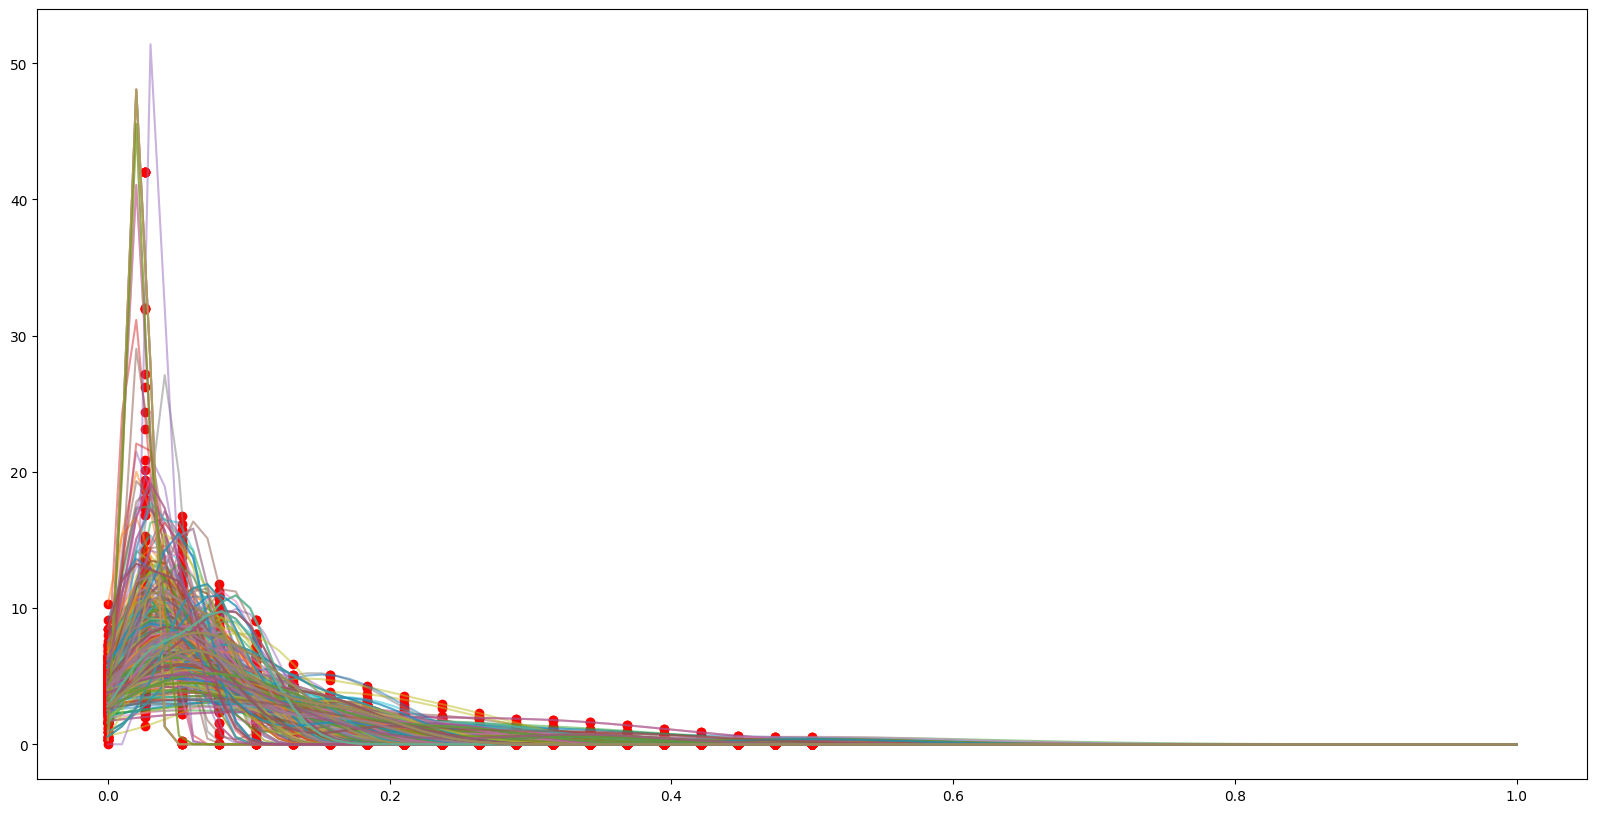

In [80]:
# Plot all the shots_prob

fig, ax = plt.subplots(figsize=(20, 10))
# ax.set_xlim(0, 0.4)
x = np.linspace(0, 1, 100)

for player_id in shots_prob_emb_ds.index:
    y = shots_prob_emb_ds.loc[player_id, "shots_prob"].pdf(x)
    ax.plot(x, y, alpha=0.5)

    # Plot dots for each shots_prob_0
    ax.scatter(
        x_space,
        [float(shots_prob_emb_ds.loc[player_id, f"shots_prob_{i}"]) for i in range(20)],
        color="red",
    )

In [61]:
shots_prob_emb_ds.keys()  # Index(['emb_0', 'emb_1', 'emb_2', 'shots_prob'], dtype='object')

Index(['emb_0', 'emb_1', 'emb_2', 'shots_prob_0', 'shots_prob_1',
       'shots_prob_2', 'shots_prob_3', 'shots_prob_4', 'shots_prob_5',
       'shots_prob_6', 'shots_prob_7', 'shots_prob_8', 'shots_prob_9',
       'shots_prob'],
      dtype='object')

In [36]:
tp_ds = EPL_Full_Data.get_transition_prob_dataset()

tp_ds = tp_ds[tp_ds["player_id"] != 0]
tp_ds = tp_ds[tp_ds["shots_prob"] != 0]

players_tp_ds = tp_ds.groupby("player_id")
players_tp_ds

In [50]:
players_tp_ds_shots_prob = players_tp_ds["shots_prob"].agg(
    ["mean", "var", "std", "skew"]
)
players_tp_ds_shots_prob

,mean,var,std,skew
player_id,,,,
3.0,0.090559,0.005144,0.071722,2.440234
160.0,0.095833,0.010035,0.100173,NaN
363.0,0.072711,0.005489,0.074087,1.793149
1131.0,0.064607,0.004733,0.068795,2.062874
1195.0,0.050000,NaN,NaN,NaN
...,...,...,...,...
106760.0,0.070733,0.002767,0.052600,1.213489
115556.0,0.084961,0.003668,0.060560,0.720802
126184.0,0.022222,NaN,NaN,NaN


In [51]:
# join emb_0, emb_1, emb_2 from shots_prob_emb_ds with mean and var from players_tp_ds_shots_prob by player_id

players_tp_ds_shots_prob_emb_ds = shots_prob_emb_ds.join(players_tp_ds_shots_prob)
players_tp_ds_shots_prob_emb_ds

,emb_0,emb_1,emb_2,name,position,team,id,mean,var,std,skew
17733.0,-2.499677,1.360883,7.071073,Lukas Podolski,F,Arsenal,17733,0.051081,0.001940,0.044046,1.085841
19524.0,-2.674822,1.411624,7.326234,Santi Cazorla,M,Arsenal,19524,0.057008,0.001970,0.044388,0.820785
15943.0,-2.567726,1.376288,7.273533,Thomas Vermaelen,D,Arsenal,15943,0.054495,0.001059,0.032537,0.365210
20467.0,-2.573912,1.343325,7.052621,Theo Walcott,F,Arsenal,20467,0.087910,0.006270,0.079183,1.143234
80254.0,-2.75456,1.458285,7.48171,Carl Jenkinson,D,Arsenal,80254,0.054212,0.000861,0.029341,-0.934244
...,...,...,...,...,...,...,...,...,...,...,...
103912.0,-4.502722,1.489493,5.221742,Jordon Ibe,F,Liverpool,103912,0.070588,NaN,NaN,NaN
92790.0,0.422836,6.731635,3.907287,Michael Harriman,D,Queens Park Rangers,92790,NaN,NaN,NaN,NaN
94738.0,-4.04571,5.307006,2.330507,Billy Knott,M,Sunderland,94738,NaN,NaN,NaN,NaN
76227.0,-5.313692,3.136131,3.519039,Fraser Fyvie,M,Wigan Athletic,76227,NaN,NaN,NaN,NaN


In [ ]:
players_tp_ds_shots_prob = players_tp_ds["shots_prob"].apply(lambda x: x.values)

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim

In [135]:
# Output is a Mean and Variance
class ShotsProbModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU(),
        )

        for i in range(len(hidden_sizes) - 1):
            self.linear_relu_stack.add_module(
                f"linear{i}", nn.Linear(hidden_sizes[i], hidden_sizes[i + 1])
            )
            self.linear_relu_stack.add_module(f"relu{i}", nn.ReLU())

        self.linear_relu_stack.add_module(
            "linear_out", nn.Linear(hidden_sizes[-1], output_size)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits


# Define the model
input_dim = 3
output_dim = 2

model = ShotsProbModel(input_dim, [64, 32, 16], output_dim)
device = torch.device("mps")
model = model.to(device)

In [136]:
# Define the batch size
batch_size = 16

In [125]:
from sklearn.model_selection import train_test_split
import numpy as np

In [137]:
data = players_tp_ds_shots_prob_emb_ds[["emb_0", "emb_1", "emb_2", "mean", "var"]]
data = data.dropna()

X = data[["emb_0", "emb_1", "emb_2"]].values
y = data[["mean", "var"]].values

# Convert to torch tensors

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Pad the training data to be able to use a batch size of 32

def pad_batches(X_train, y_train, batch_size):
    """
    Pads the training data to ensure the number of samples is a multiple of the batch size.

    Parameters:
    X_train (np.ndarray): Training features.
    y_train (np.ndarray): Training labels.
    batch_size (int): Size of each batch.

    Returns:
    np.ndarray, np.ndarray: Padded training features and labels.
    """
    size_of_last_batch = X_train.shape[0] % batch_size
    amm_to_pad = batch_size - size_of_last_batch

    if amm_to_pad > 0 and amm_to_pad < X_train.shape[0]:
        X_train = np.concatenate((X_train, X_train[:amm_to_pad]))
        y_train = np.concatenate((y_train, y_train[:amm_to_pad]))

    return X_train, y_train

X_train, y_train = pad_batches(X_train, y_train, batch_size)
X_test, y_test = pad_batches(X_test, y_test, batch_size)

# Convert to torch tensors
X_train = torch.tensor(X_train.astype(float), dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.astype(float), dtype=torch.float32).to(device)
X_test = torch.tensor(X_test.astype(float), dtype=torch.float32).to(device)
y_test = torch.tensor(y_test.astype(float), dtype=torch.float32).to(device)


# Define the dataloaders
train_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_train, y_train), batch_size=batch_size
)

test_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_test, y_test), batch_size=batch_size
)

In [138]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([320, 3]),
 torch.Size([80, 3]),
 torch.Size([320, 2]),
 torch.Size([80, 2]))

In [139]:
from tqdm import tqdm

In [140]:
for i, (X_batch, y_batch) in enumerate(train_loader):
    print(X_batch.size(), y_batch.size())

torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])
torch.Size([16, 3]) torch.Size([16, 2])


In [144]:
# Define the loss function
criterion = nn.MSELoss().to(device)

# Define the optimizer
# optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Define the number of epochs
n_epochs = 100

In [145]:
# Training loop
train_losses = []
test_losses = []
iterator = tqdm(range(n_epochs))
for epoch in iterator:
    model.train()
    for i, (X_batch, y_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        for i, (X_batch, y_batch) in enumerate(test_loader):
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)

        test_losses.append(loss.item())

    iterator.set_postfix(loss=loss.item())

100%|██████████| 100/100 [00:07<00:00, 13.33it/s, loss=0.00171]


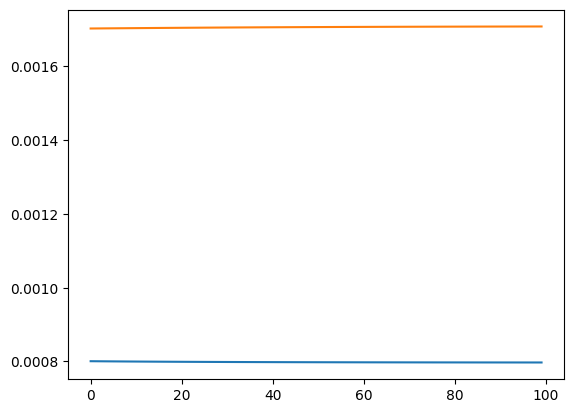

In [146]:
# Plot the training and test losses
plt.plot(train_losses, label="train")
plt.plot(test_losses, label="test")